# Data Generation and Visualization LAB.1 Solutions

In this lab we play around with some famous benchmarks. Let's start by importing all the modules

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
from typing import Union # for checks

## Exercise 1

Generate data from two random Gaussians, each of which represents a class. 
Flip randomly a percentage of the labels and plot the results.

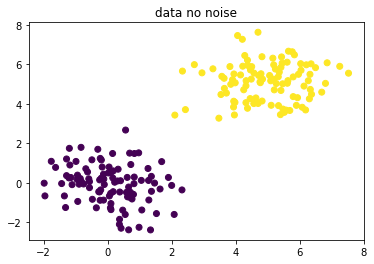

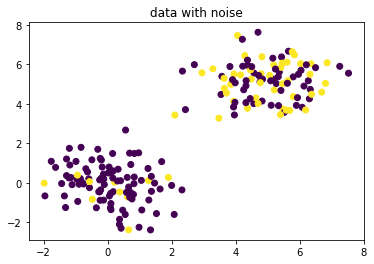

In [2]:
def generate_data(gaussians: tuple[dict], 
                  numb_data: Union[int, list, tuple]):

    if isinstance(numb_data, int):
        numb_data = [numb_data] * len(gaussians)

    classes = np.arange(len(gaussians))

    result = []
    for idx, gaussian in enumerate(gaussians):
        gaussian["size"] = (numb_data[idx], )
        data_g = np.random.multivariate_normal(**gaussian)
        data_class = np.repeat(classes[idx], data_g.shape[0])
        result.append(np.column_stack((data_g, data_class)))

    return result

def plot_data(data):
    stack_data = np.vstack(data)
    plt.scatter(stack_data[:, 0], stack_data[:, 1],
                c=stack_data[:, -1])
    plt.show()


def binary_flip_classes(data, percentages):

    if isinstance(percentages, float):
        percentages = [percentages] * len(data)

    gaussian1, gaussian2 = data
    value1, value2 = [0, 1]

    idx_flip1 = np.random.choice(gaussian1.shape[0], 
                                 int(percentages[0] * gaussian1.shape[0]))
    idx_flip2 = np.random.choice(gaussian2.shape[0],
                                 int(percentages[1] * gaussian2.shape[0]))

    gaussian1[idx_flip1, -1] = value2
    gaussian2[idx_flip2, -1] = value1
    
    return gaussian1, gaussian2


# generate two gaussians
gaussians = [{'mean': np.zeros(2), 'cov': np.eye(2)}, 
             {'mean': 5+np.zeros(2), 'cov': np.eye(2)}]

gaussian_data = generate_data(gaussians, 100)

# plot data
plt.title("data no noise")
plot_data(gaussian_data)

# flip classes
gaussian_data = binary_flip_classes(gaussian_data, [0.1, 0.8])

# plot data
plt.title(f"data with noise")
plot_data(gaussian_data)


## Exercise 2

It is defined by the following mapping:
$$x = \phi\cos(\phi) , y= \phi\sin(\phi) , z = \psi$$
with $\phi \in(1.5\pi, 4.5\pi)$ and $\psi \in(0,10)$


Create the dataset of $n=1000$ points, plot them in 2d and 3d.

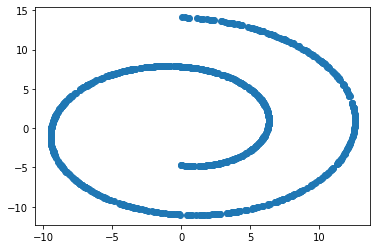

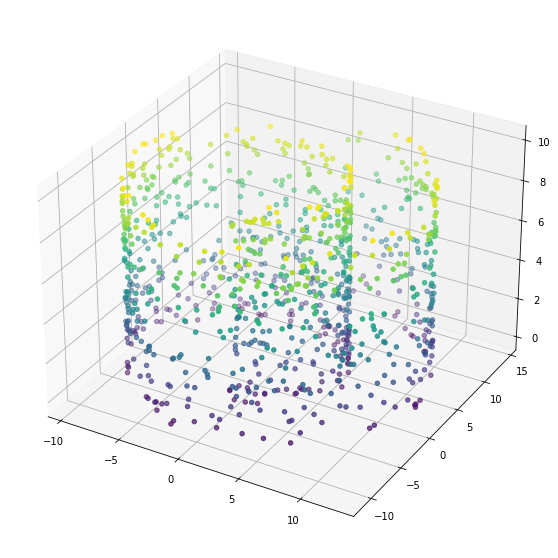

In [5]:
phi = np.random.uniform(low=np.pi*1.5, high=np.pi*4.5, size=(1000,))
psi = np.random.uniform(low=0, high=10, size=(1000,))
x = phi * np.cos(phi)
y = phi * np.sin(phi)
z = psi

# 2d plot
plt.scatter(x, y)

# 3d plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c=z)
